## MIC

MIC 即：Maximal Information Coefficient 最大互信息系数。
使用MIC来衡量两个基因之间的关联程度，线性或非线性关系，相较于Mutual Information（MI）互信息而言有更高的准确度。MIC是一种优秀的数据关联性的计算方式。本篇文章将会详细介绍MIC的算法原理，优缺点以及Python的具体实现方式，并给出一个可视化方案。

### 互信息？

互信息(Mutual Information)是信息论里一种有用的信息度量，它可以看成是一个随机变量中包含的关于另一个随机变量的信息量，或者说是一个随机变量由于已知另一个随机变量而减少的不肯定性。这个已经是机器学习中老生常谈的内容了，如果想不起来，请参考[百度百科-互信息](https://baike.baidu.com/item/%E4%BA%92%E4%BF%A1%E6%81%AF/7423853?fr=aladdin)

## MIC的优越性

根据 MIC 的性质，MIC 具有普适性、公平性和对称性。所谓普适性，是指在样本量足够大(包含了样本的大部分信息)时，能够捕获各种各样的有趣的关联，而不限定于特定的函数类型(如线性函数、指数函数或周期函数)，或者说能均衡覆盖所有的函数关系。一般变量之间的复杂关系不仅仅是通过单独一个函数就能够建模的，而是需要叠加函数来表现。所谓公平性，是指在样本量足够大时能为不同类型单噪声程度相似的相关关系给出相近的系数。例如，对于一个充满相同噪声的线性关系和一个正弦关系，一个好的评价算法应该给出相同或相近的相关系数。

**算法对比**
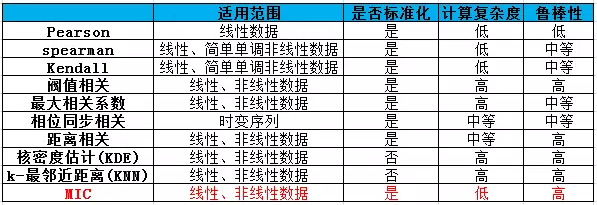

**理解公平性与普适性**

对于普适性较好的函数，不同类型的关联关系其起点应当是接近的。而且是接近于一的。

而对于公平性较好的比较方法，随着噪音的增加，不同类型关联关系函数变化应当是相近的。

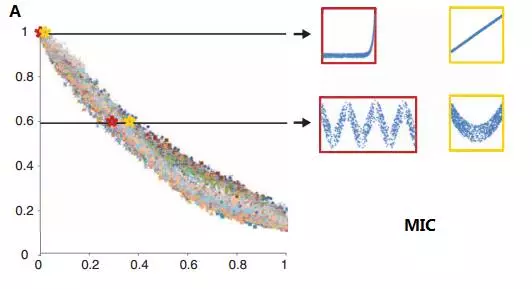

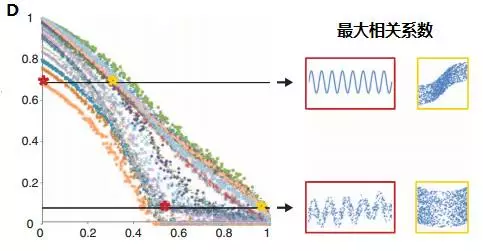

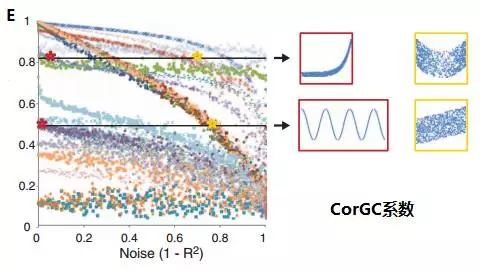

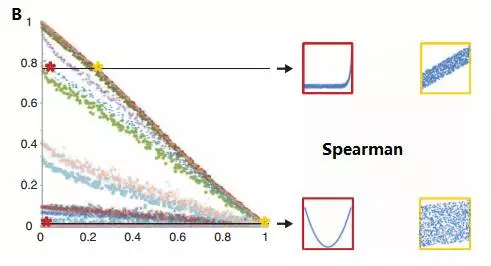

由上可见，MIC拥有出色的普适性与公正性。

## 算法原理

mic 基本原理会利用到互信息概念，互信息的概念使用以下方程来说明：

$$I(x;y)=\int p(x,y) log_2 \frac{p(x,y)}{p(x)p(y)}\mathrm{d}x\mathrm{d}y$$
一般情况下联合概率计算相对来说比较麻烦，要是不记得联合概率可以去这里看看：联合概率

mic 的想法是针对两个变量之间的关系离散在二维空间中，并且使用散点图来表示，将当前二维空间在 x,y 方向分别划分为一定的区间数，然后查看当前的散点在各个方格中落入的情况，这就是联合概率的计算，这样就解决了在互信息中的联合概率难求的问题。下面的公式给出 mic 的计算公式：

$$mic(x;y)=\max_{a*b<B}\frac{I(x;y)}{log_2\min(a,b)}$$
上式中 a,b 是在 x,y 方向上的划分格子的个数，本质上就是网格分布，B 是变量，在原作者的论文当中提到 B 的大小设置是数据量的 0.6 次方左右。

## 算法原理的通俗解释
算法原理或许介绍的还是有点负责，下面还有一种简单带的解释：


MIC计算分为三个步骤：

 1. 给定i、j，对XY构成的散点图进行i列j行网格化，并求出最大的互信息值
 2. 对最大的互信息值进行归一化
 3. 选择不同尺度下互信息的最大值作为MIC值
 
### 计算互信息，求最大互信息

互信息的计算方案，下面就是划分方式的一个示例。

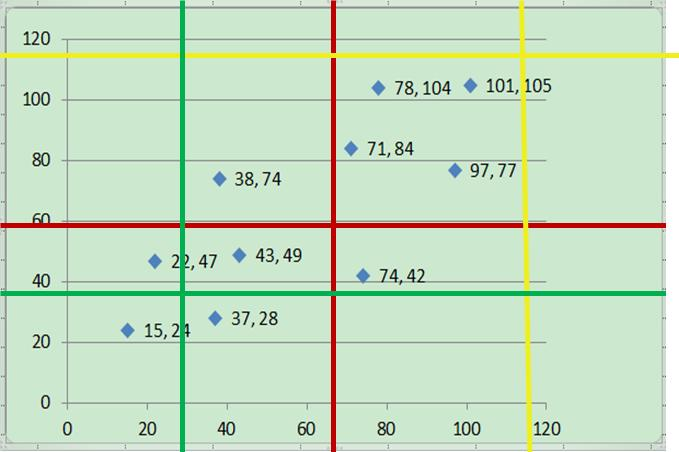


那么，给定了某个网格化方案后，如何计算其对应的互信息值呢？这里以上图中红色的网格化方案为例进行说明。红色网格化方案将所有数据点分为四个区域：左上，右上，左下，右下。每个区域对应的数据点数量为1，4，4，1。将数据点数归一化得到四个区域的数据点频率，分别为0.1，0.4，0.4，0.1。也就是说，此时，X有两种取值：左和右，Y有两种取值：上和下。P(X=左,Y=上)=0.1，P(X=右,Y=上)=0.4，P(X=左,Y=下)=0.4，P(X=右,Y=下)=0.1。并且，P(X=左)=0.5，P(X=右)=0.5，P(Y=上)=0.5，P(Y=下)=0.5。根据互信息计算公式，得到X和Y在这种分区下的互信息为： 

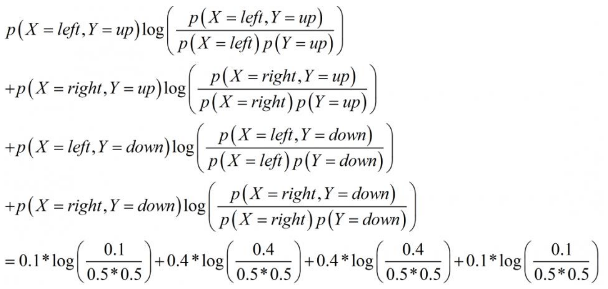

以此类推，算出哪种方案得到的互信息值最大，最大的互信息值是多少。

### 对最大的互信息值进行归一化
将得到的最大互信息除以log(min(X,Y))，即为归一化.这个与互信息原公式有关。此处推导已经超出本文章范围，不再做详细解释。只需要记住这一步是进行归一化即可。

### 选择不同尺度下互信息的最大值作为MIC值
上面讲述了给定i和j的情况下M(X,Y,D,i,j)的计算方法。这一步就是给定很多(i,j)值，计算每一种情况下M(X,Y,D,i,j)的值，将所有M(X,Y,D,i,j)中的最大那个值作为MIC值。注意的是，这里的(i,j)是有条件的，要满足，n表示数据集D的数据量。当然，B(n)这个值可以自己定，这里是别人做实验认为效果最好的值。

## 具体实现

在Python中的minepy类库中实现了MIC算法，具体使用如下。第一段代码展示的是直接使用MIC。而第二段函数则展示了，如何在sklearn的单变量选择方法中使用该函数。除此之外值得一提的是，minepy含有很多其他系数，有兴趣的话也可以研究一下。

### 参数解释
 - 阿尔法（float数据类型，取值范围为（0 ，1.0 ] 或 > = 4） 如果alpha的取值范围在（0,1]之内，那么B的取值范围为（N ^α，4）其中n是样本的数目。如果alpha的取值范围是是> = 4。 alpha直接定义B参数。如果alpha高于样本数（n），则它将被限制为n，因此B的取值实际上是个分段函数，具体公式为：B = min（alpha，n）。
 - c（float 取值范围为大于）） - 确定比每个分区中的列多多个块。默认值为15，这意味着当尝试在x轴上绘制x网格线时，算法将以最多15 * x个团块开始。

In [2]:
import numpy as np
from minepy import MINE

x = np.linspace(0, 1, 1000)
y = np.sin(10 * np.pi * x) + x
mine = MINE(alpha=0.6, c=15)
mine.compute_score(x, y)

print("Without noise:")
print("MIC", mine.mic())
print()

np.random.seed(0)
y += np.random.uniform(-1, 1, x.shape[0])  # add some noise
mine.compute_score(x, y)

print("With noise:")
print("MIC", mine.mic())

Without noise:
MIC 1.0000000000000002

With noise:
MIC 0.5057166934173714


In [4]:
from minepy import MINE
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest

irisdata = load_iris()


def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)


#选择 K 个最好的特征，返回特征选择后的数据
irisdata_new =  SelectKBest(lambda X, Y: tuple(map(tuple,np.array(list(map(lambda x:mic(x, Y), X.T))).T)), k=3).fit_transform(irisdata.data, irisdata.target)

In [5]:
print(irisdata.data.shape,irisdata_new.shape)

(150, 4) (150, 3)


## 可视化

在具体的使用中，有时候我们还需要进行可视化来进行数据探索等等诸多任务，因此我在此处还给出了可视化的方案。首先我们还是使用UCI的红酒质量数据集。然后利用`minepy.MINE`计算不同特征之间的MIC，然后利用searbon进行矩阵可视化。然后是一个更复杂的例子，同时这个例子也很好的证明了MIC的优秀性能。

**下面是具体实现：**

数据集可以前往[我的Github下载](https://github.com/FontTian/hyperopt-doc-zh/tree/master/tutorials/data)

In [6]:
import pandas as pd
# 从硬盘读取数据进入内存
wine = pd.read_csv("G:/Data/dataset/wine/wine.csv")


def MIC_matirx(dataframe, mine):

    data = np.array(dataframe)
    n = len(data[0, :])
    result = np.zeros([n, n])

    for i in range(n):
        for j in range(n):
            mine.compute_score(data[:, i], data[:, j])
            result[i, j] = mine.mic()
            result[j, i] = mine.mic()
    return pd.DataFrame(result)


data_wine_mic = MIC_matirx(wine, MINE(alpha=0.6, c=15))
data_wine_mic

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.999993,0.137049,0.359700,0.112888,0.104252,0.088545,0.087136,0.331103,0.363157,0.099565,0.091545,0.069389
1,0.137049,0.999859,0.342359,0.064291,0.088238,0.069755,0.075222,0.118709,0.091161,0.114195,0.097584,0.147521
2,0.359700,0.342359,0.999973,0.074586,0.094596,0.071099,0.114753,0.174092,0.228624,0.118638,0.094839,0.084114
3,0.112888,0.064291,0.074586,0.997599,0.098073,0.065086,0.073607,0.215840,0.081221,0.054224,0.076167,0.063269
4,0.104252,0.088238,0.094596,0.098073,0.999919,0.069770,0.093126,0.207912,0.106185,0.094228,0.137368,0.091436
5,0.088545,0.069755,0.071099,0.065086,0.069770,0.999986,0.478336,0.097462,0.061461,0.050779,0.046499,0.042377
6,0.087136,0.075222,0.114753,0.073607,0.093126,0.478336,0.999993,0.128559,0.105838,0.083387,0.123327,0.131426
7,0.331103,0.118709,0.174092,0.215840,0.207912,0.097462,0.128559,0.999997,0.171056,0.139684,0.257593,0.136607
8,0.363157,0.091161,0.228624,0.081221,0.106185,0.061461,0.105838,0.171056,0.999808,0.073231,0.074370,0.046885
9,0.099565,0.114195,0.118638,0.054224,0.094228,0.050779,0.083387,0.139684,0.073231,0.999890,0.118204,0.150187


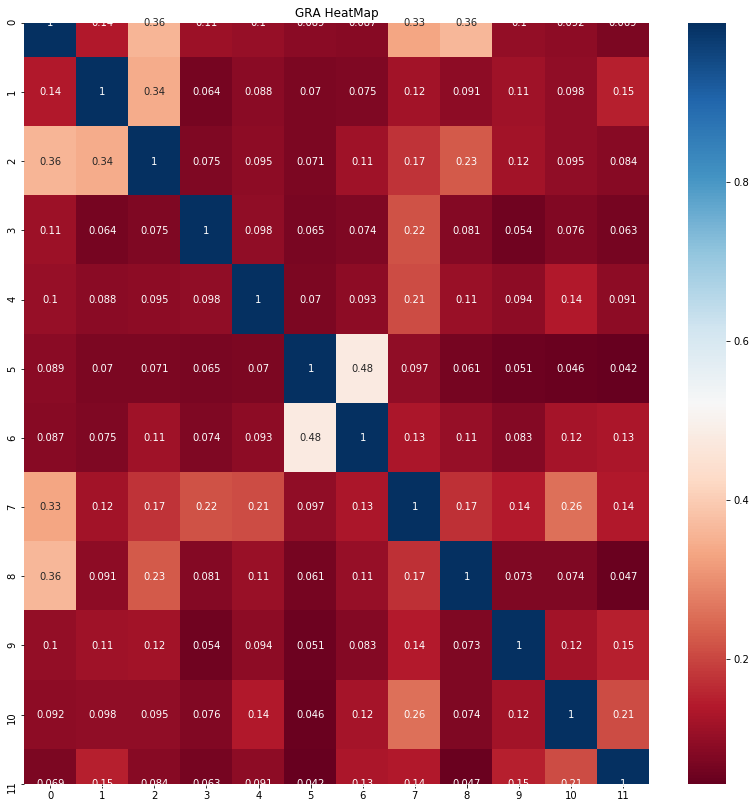

In [10]:
# MIC结果矩阵可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def ShowHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(14, 14))
    ax.set_title('GRA HeatMap')
    sns.heatmap(DataFrame.astype(float),
                cmap=colormap,
                ax=ax,
                annot=True,
                yticklabels=ylabels,
                xticklabels=ylabels)
    plt.show()


ShowHeatMap(data_wine_mic)

### 一个更复杂的例子

下面我们生成一组数据来进行MIC的测试，生成数据的公式来自数据集采用Friedman #1回归数据（这篇[论文](ftp://ftp.uic.edu/pub/depts/econ/hhstokes/e538/Friedman_mars_1991.pdf)中的数据）。数据是用这个公式产生的：



X1到X5是由单变量分布生成的，e是标准正态变量N(0,1)。另外，原始的数据集中含有5个噪音变量 X5,…,X10，跟响应变量是独立的。我们增加了4个额外的变量X11,…X14，分别是X1,…,X4的关联变量，通过f(x)=x+N(0,0.01)生成，这将产生大于0.999的关联系数。关于特征选择的Bryan__ 也有一篇不错的文章-[结合Scikit-learn介绍几种常用的特征选择方法](https://blog.csdn.net/bryan__/article/details/51607215 )，下面的数据生成代码就是从这篇文章中的代码修改而来的。

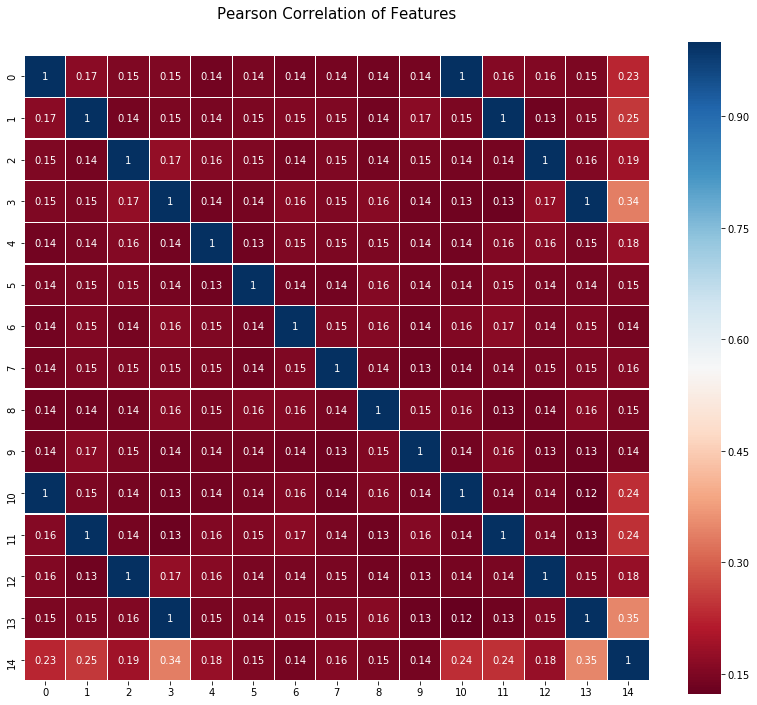

In [7]:
# 固定随机数，以确保每次生成的随机数固定
np.random.seed(42)

size = 750
X = np.random.uniform(0, 1, (size, 14))

#"Friedamn #1” regression problem
Y = (10 * np.sin(np.pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - .5)**2 +
     10 * X[:, 3] + 5 * X[:, 4] + np.random.normal(0, 1))
#Add 3 additional correlated variables (correlated with X1-X3)
X[:, 10:] = X[:, :4] + np.random.normal(0, .025, (size, 4))

names = ["x%s" % i for i in range(1, 15)]

# 构建生成DF数据集
Friedman_regression_data = pd.DataFrame(X)
Friedman_regression_data['y'] = Y

# 获取MIC矩阵
mine = MINE(alpha=0.6, c=15)
data_wine_mic = MIC_matirx(Friedman_regression_data, mine)
# 进行结果可视化
ShowHeatMap(data_wine_mic)

**代码与结果解读**
首先固定随机数，以确保每次生成的随机数固定。然后生成一个750行，10列取值范围在0-1内的随机矩阵。之后按照"Friedamn #1"生成Y，并将X的前四列，增加随机项，生成11-14项特征。

之后就是将numpy数组修改为dataframe数组，并传入MIC矩阵的计算函数，最终进行seaborn进行矩阵可视化。

结果非常不错除了中间特征与自己本身的高度相关之外。我们可以很明显的发现第1-4特征与第11-14项特征MIC为1.这已经充分证明了MIC优秀的性能。



## 参考与学习推荐

首先非常感谢已经有两位网上的同行以及写过有关MIC的很优秀的文章，同时也感谢wiki百科以及其他网络资料。

 - [Maximal Information Coefficient (MIC)最大互信息系数](https://blog.csdn.net/u014271612/article/details/51781250)
 - [最大信息系数方法](https://www.deeplearn.me/1466.html)
 - [wiki:Maximal information coefficient](https://en.wikipedia.org/wiki/Maximal_information_coefficient)
 - [minepy中的python API](https://minepy.readthedocs.io/en/latest/python.html)
 - [Maximal Information Coefficient (MIC)最大互信息系数](https://blog.csdn.net/u014271612/article/details/51781250)
 - [最大信息系数方法](https://www.deeplearn.me/1466.html)
 - [结合Scikit-learn介绍几种常用的特征选择方法](https://blog.csdn.net/bryan__/article/details/51607215 )